# ***Import Packages***

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


# ***Load Data***

Training set shape:  (60000, 28, 28)
Test set shape:  (10000, 28, 28)


<function matplotlib.pyplot.show(close=None, block=None)>

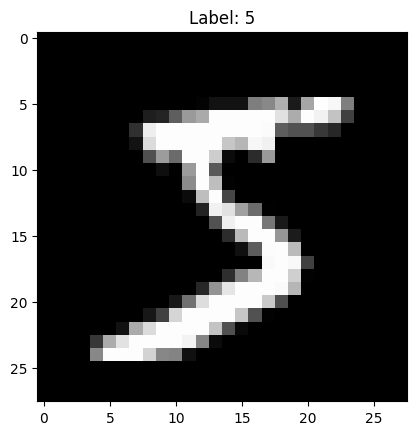

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training set shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

plt.imshow(X_train[0], cmap= 'gray')
plt.title(f"Label: {y_train[0]}")
plt.show

# **Normalise the images**

In [3]:
X_train = X_train/225.0
X_test = X_test/225.0

# ***Build Model***

In [17]:
model = Sequential([
    Input(shape = (28, 28)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10 classes for digits 0-9
])

# **Compile**

In [5]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [18]:
model.compile(
    loss = SparseCategoricalCrossentropy(),
    optimizer = 'adam',
    metrics = ['accuracy']
)
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8762 - loss: 0.4165 - val_accuracy: 0.9631 - val_loss: 0.1161
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9685 - loss: 0.1043 - val_accuracy: 0.9708 - val_loss: 0.0997
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9788 - loss: 0.0676 - val_accuracy: 0.9712 - val_loss: 0.0906
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9838 - loss: 0.0508 - val_accuracy: 0.9711 - val_loss: 0.0925
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0426 - val_accuracy: 0.9737 - val_loss: 0.0916
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9896 - loss: 0.0323 - val_accuracy: 0.9738 - val_loss: 0.0952
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0256 - val_accuracy: 0.9763 - val_loss: 0.0821
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9933 - loss: 0

**Training vs Validation Accuracy and loss**

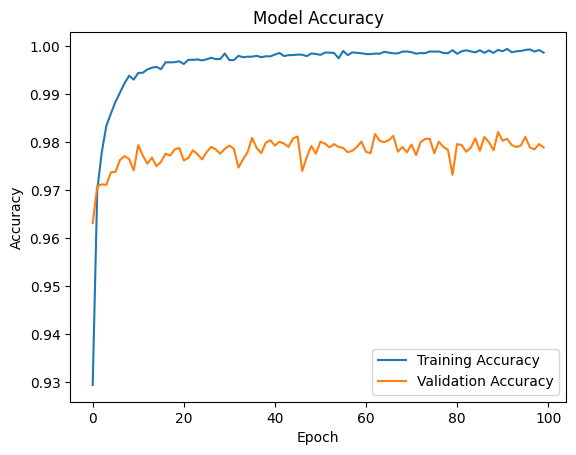

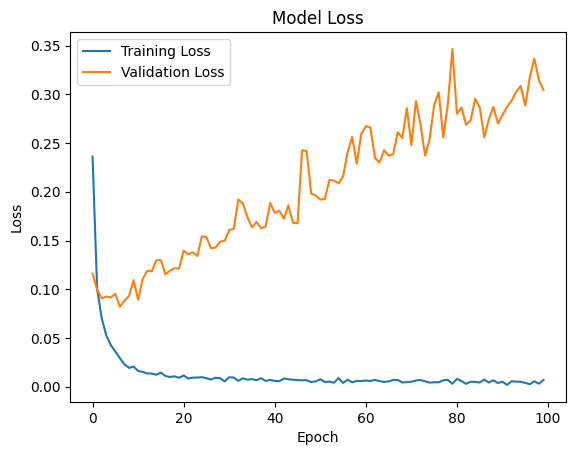

In [19]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# ***Evaluate the Model***

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest Accuracy: ", test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9809 - loss: 0.2798

Test Accuracy:  0.98089998960495


# ***Make Predictions***

In [8]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step   


**Example**

Predicted Label:  7


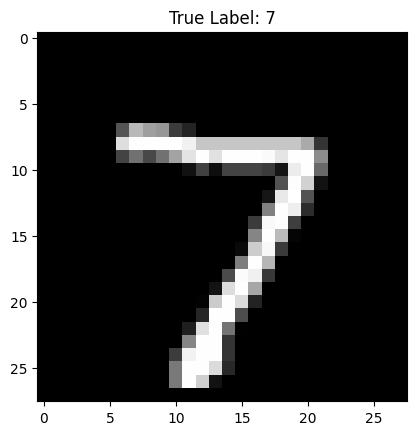

In [10]:
print("Predicted Label: ", np.argmax(predictions[0]))
plt.imshow(X_test[0], cmap = 'gray')
plt.title(f"True Label: {y_test[0]}")
plt.show()

**All Digits from 0-9**

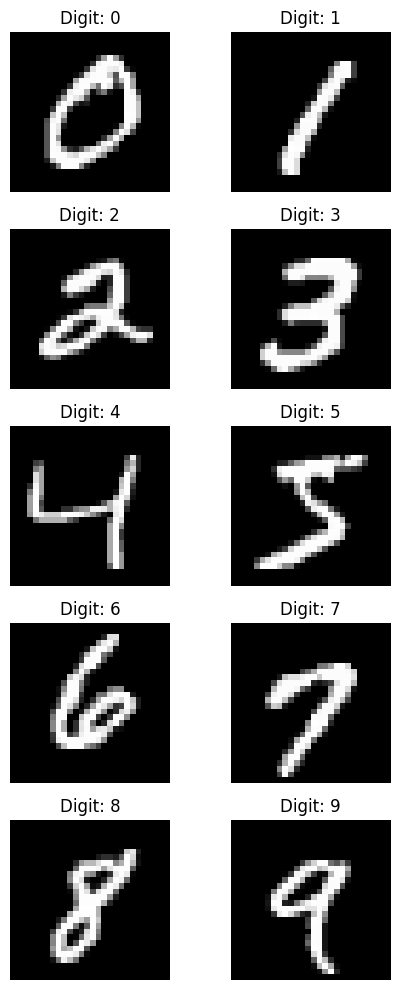

In [14]:
examples = []

for digits in range(10):
    idx = np.where(y_train == digits)[0][0]
    examples.append(X_train[idx])

fig, axes, = plt.subplots(5,2, figsize = (5,10))

for i, ax in enumerate(axes.flat):
    ax.imshow(examples[i], cmap = 'gray')
    ax.set_title(f"Digit: {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()